## Loading

In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [36]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
dataset = dataset.drop('class', axis=1)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


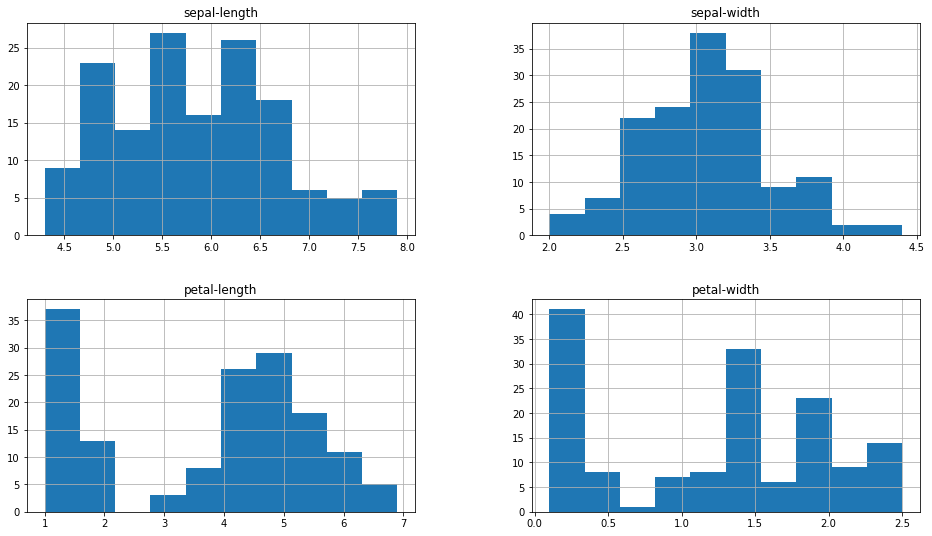

In [39]:
dataset.hist(figsize=(16,9))
plt.show()

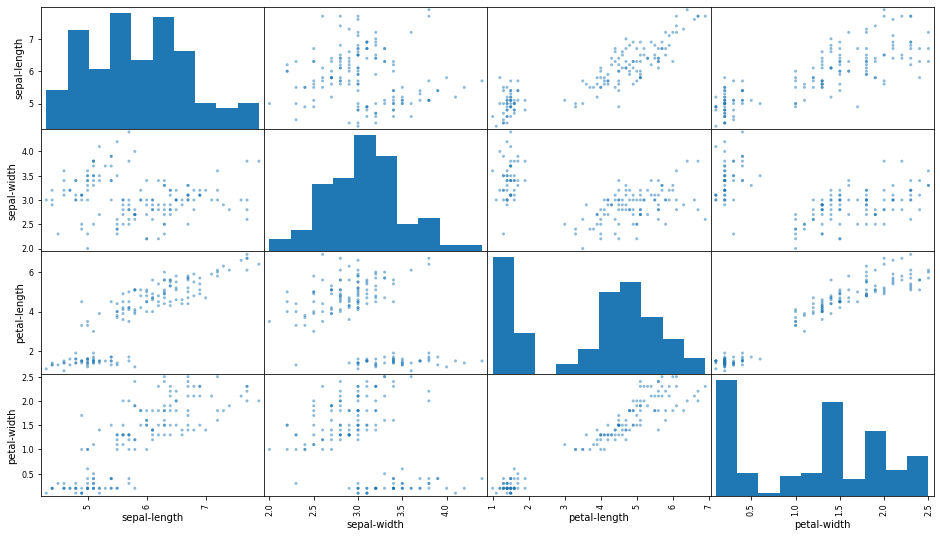

In [40]:
scatter_matrix(dataset, figsize=(16, 9))
plt.show()

<AxesSubplot:xlabel='petal-length', ylabel='petal-width'>

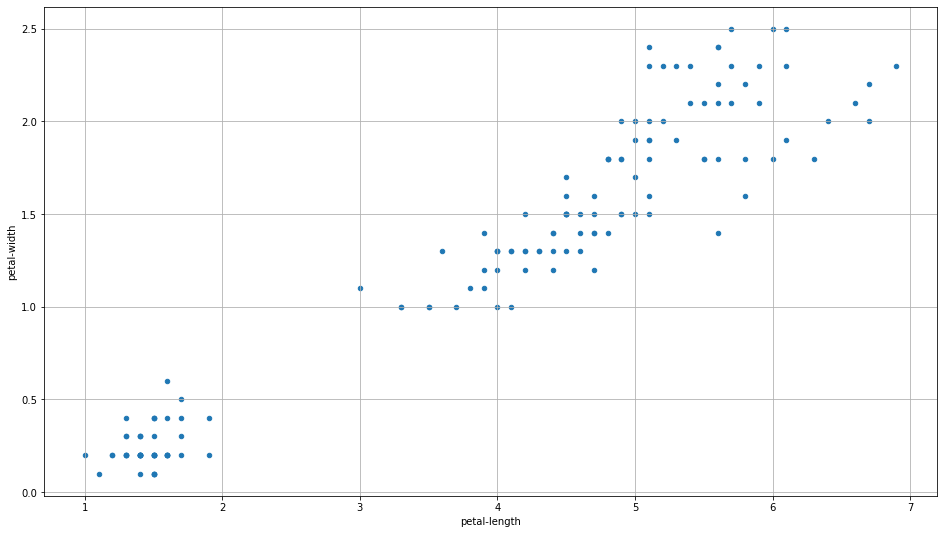

In [41]:
dataset.plot.scatter('petal-length', 'petal-width', grid=True, figsize=(16,9))

## Preprocessing

In [42]:
import numpy as np
np.any(np.isnan(dataset.values))

False

We should normalize the columns we are going to use because it is always better to work with data in the same scale

\begin{align*}
	s &\leftarrow \frac{s - \bar{s}}{S} \\
	s &\leftarrow \frac{s - \min_n \{ s_n \}}{\max_n \{ s_n \} - \min_n \{ s_n \}}
\end{align*}

The **zscore** function operates a standardization of its inputs.

In [43]:
from scipy.stats import zscore
x = zscore(dataset['petal-length'].values).reshape(-1, 1) # we reshape our feature column as a (n_sample, n_features) matrix
y = zscore(dataset['petal-width'].values)

## Scikit-Learn Toolbox

In [44]:
from sklearn import linear_model

a linear model is good to predict the petal-width given the petal-length

In [45]:
lin_model = linear_model.LinearRegression()
lin_model.fit(x, y)

LinearRegression()

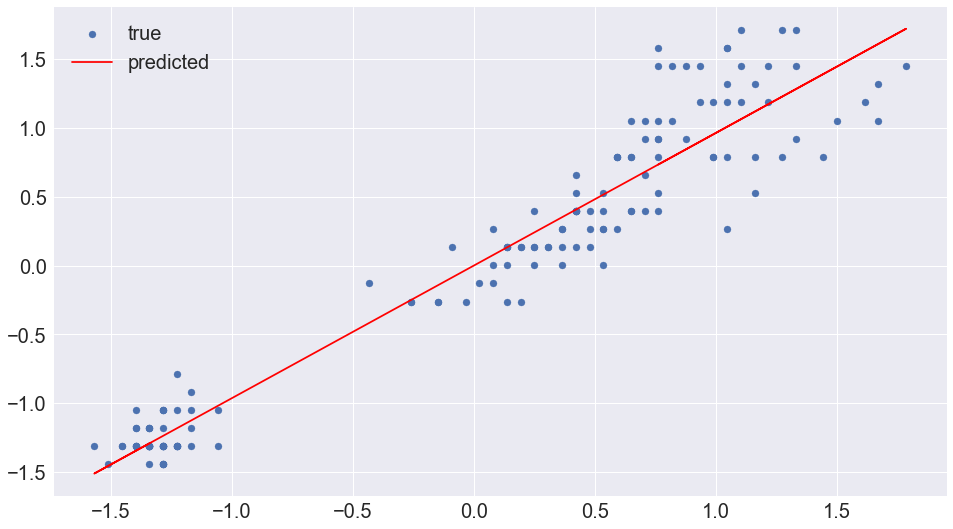

In [46]:
with plt.style.context('seaborn'): # use your favorite style, if you don't like the standard one
  plt.figure(figsize=(16,9))
  plt.scatter(x, y, label='true') 

  w1 = lin_model.coef_ # weights of the model are stored here
  w0 = lin_model.intercept_ # and here it is the intercept

  # Compute the y component of the regression line

  y_pred = lin_model.predict(x)
  #y_pred = [w1 * sample + w0 for sample in x.flatten()] 

  # (we used a list comprehension here, have a look to the python tutorial
  #  if you don't know what it is!)

  plt.plot(x, y_pred, label='predicted', color='red')

  # enlarging fonts
  plt.legend(prop={'size': 20})
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

In [48]:
# it tells us how much of the prediction differs from the true value.
lin_model._residues

10.964815811699454

In [49]:
# it tells us how the fraction of the variance of the data explained by the model
# (how much better we are doing w.r.t. just using the mean of the target).
# In spaces with a single feature this is equal to the correlation coefficient between the input and the output;
r2_score(y, y_pred)

0.9269012279220037

In [50]:
# it tells approximately how much error we get on a predicted data over the training set
mean_squared_error(y, y_pred)

0.07309877207799638

In [51]:
# i don't know what this is
f_regression(x, y) # it outputs a tuple: (value of the F-statistics, its p-value)

(array([1876.65781288]), array([5.77666099e-86]))

## Custom Implementation

We can also implement Least-Squares from scratch, using its closed-form:

\begin{equation}
\hat{\mathbb{w}}_{OLS} = (\mathbb{\Phi}^{\top}\mathbb{\Phi})^{-1}\mathbb{\Phi}^{\top}\ \mathbb{t},
\end{equation}

where $\mathbb{\Phi}= (\phi(x_1), \dots, \phi(x_N))^{\top}$ and $\mathbb{t} = (t_1, \dots, t_N)^{\top}.$

By using **numpy**:

In [52]:
from numpy.linalg import inv

n_samples = len(x)
Phi = np.ones((n_samples, 2))
Phi[:, 1] = x.flatten() # the second column is the feature

# 'T' represents the transposed matrix
# @ is the matrix product
# the method 'dot' is the matrix product
w = inv(Phi.T @ Phi) @ (Phi.T.dot(y))

In [53]:
w

array([8.33975179e-16, 9.62757097e-01])

## Regularization

If we need to mitigate over-fitting effects in a model we might resort to some regularization techniques, like Ridge regression or Lasso regression.

### Ridge Regression
Linear least squares with l2 regularization.

In [54]:
ridge_model = linear_model.Ridge(alpha=10)
ridge_model.fit(x, y)

Ridge(alpha=10)

### Lasso Regression

Linear Model trained with L1 prior as regularizer.

In [55]:
lasso_model = linear_model.Lasso(alpha=10)
lasso_model.fit(x, y)

Lasso(alpha=10)

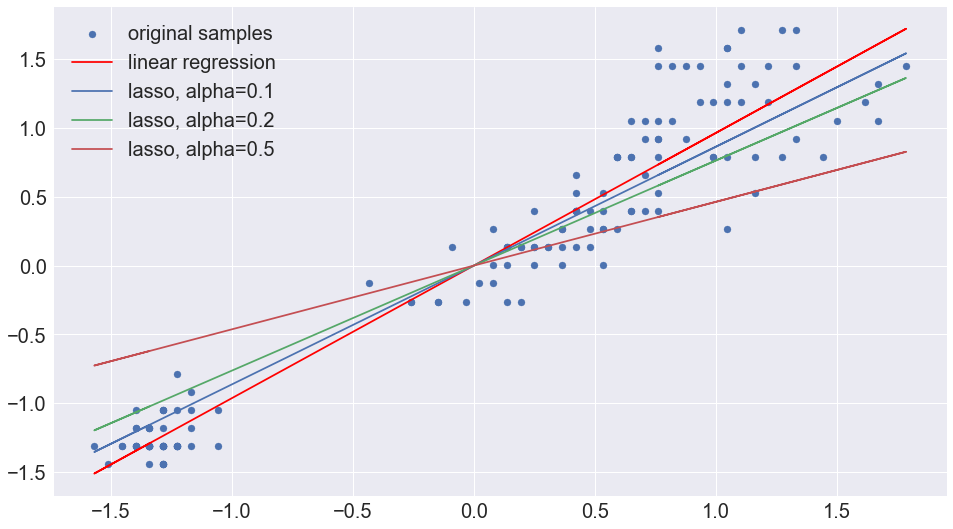

In [56]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(16,9))
  plt.scatter(x, y, label='original samples')
  y_linear = [lin_model.coef_ * x_i + lin_model.intercept_ for x_i in x]
  plt.plot(x, y_linear, label='linear regression', color='red')
  for alpha in [0.1, 0.2, 0.5]:    
    # lasso regression
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(x, y)
    y_lasso = [lasso_model.coef_ * x_i + lasso_model.intercept_ for x_i in x]
    plt.plot(x, y_lasso, label='lasso, alpha={}'.format(alpha))


  # enlarging fonts
  plt.legend(prop={'size': 20})
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  plt.show()

In [57]:
mean_squared_error(y, lasso_model.predict(x))

0.3230987720779963

## Homeworks

Here we propose some exercises in python for you. They are not mandatory, but they can be helpful to better understand the contents of the lecture, by giving you the opportunity to develop some code by yourself.

### 1) Predicting petal width

Consider again the Iris dataset, and complete the following code, by writing a script which is able to predict the petal width by using, this time, **all** the other features as input.


In [88]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Get input and output
x = zscore(dataset[names[:3]].values)
y = zscore(dataset['petal-width'].values)

# Fit your model
lin_model = linear_model.LinearRegression()
lin_model.fit(x, y)

LinearRegression()

In [95]:
y_pred = lin_model.predict(x)

In [93]:
# it tells us how much of the prediction differs from the true value.
lin_model._residues

9.292779832215205

In [92]:
# it tells approximately how much error we get on a predicted data over the training set
mean_squared_error(y, y_pred)

0.061951865548101365

In [ ]:
alpha = 100
ridge_model = linear_model.Ridge(alpha=alpha)
ridge_model.fit(x, y)


w = ### WRITE YOUR CODE HERE ###

# Compare your solution it with the scikit-learn one!
assert np.isclose(w, ridge_model.coef_), 'Something wrong!, try again...'